<h1>Module 16 Project Template</h1>

Use the code below to help you analyze the data returned by the MBTA API:

In [1]:
mbtaURL = "https://api-v3.mbta.com/vehicles?filter[route]=1&include=trip"

import urllib.request, json
with urllib.request.urlopen(mbtaURL) as url:
    data = json.loads(url.read().decode())
   
    with open('data.json', 'w') as outfile:
        json.dump(data, outfile)
   
    with open('data.txt', 'w') as outfile:
        json.dump(json.dumps(data, indent=4, sort_keys=True), outfile)
       
    print(json.dumps(data, indent=4, sort_keys=True))


{
    "data": [
        {
            "attributes": {
                "bearing": 0,
                "current_status": "IN_TRANSIT_TO",
                "current_stop_sequence": 6,
                "direction_id": 0,
                "label": "1918",
                "latitude": 42.333397,
                "longitude": -71.07350003,
                "occupancy_status": "MANY_SEATS_AVAILABLE",
                "speed": null,
                "updated_at": "2022-06-12T14:54:08-04:00"
            },
            "id": "y1918",
            "links": {
                "self": "/vehicles/y1918"
            },
            "relationships": {
                "route": {
                    "data": {
                        "id": "1",
                        "type": "route"
                    }
                },
                "stop": {
                    "data": {
                        "id": "57",
                        "type": "stop"
                    }
                },
                "trip": 

Use the code below to read the data from your MySQL database and store it in a pandas dataframe.  

You you need to install pymysql to run the code:

pip install pymysql

In [2]:
import os
import pymysql
import pandas as pd

host = '127.0.0.1'
port = '3306'
user = 'root'
password = 'passord'
database = 'MBTAdb'

conn = pymysql.connect(
    host=host,
    port=int(3306),
    user="root",
    passwd=password,
    db=database,
    charset='utf8mb4')

df = pd.read_sql_query("SELECT * FROM mbta_buses",
    conn)

df.tail(10)

,record_num,route_number,id,bearing,current_status,current_stop_sequence,direction_id,label,latitude,longitude,occupancy_status,speed,updated_at
2458,2459,1,y1737,0,IN_TRANSIT_TO,15.0,0,1737,42.357899,-71.092886,MANY_SEATS_AVAILABLE,None,2022-06-13 04:23:37
2459,2460,1,y1895,0,IN_TRANSIT_TO,5.0,0,1895,42.331263,-71.077135,MANY_SEATS_AVAILABLE,None,2022-06-13 04:23:50
2460,2461,1,y1836,0,IN_TRANSIT_TO,12.0,1,1836,42.348176,-71.088421,MANY_SEATS_AVAILABLE,None,2022-06-13 04:23:50
2461,2462,1,y1737,0,IN_TRANSIT_TO,15.0,0,1737,42.357915,-71.092893,MANY_SEATS_AVAILABLE,None,2022-06-13 04:23:42
2462,2463,1,y1895,65,IN_TRANSIT_TO,5.0,0,1895,42.331251,-71.076878,MANY_SEATS_AVAILABLE,None,2022-06-13 04:24:02
2463,2464,1,y1836,0,IN_TRANSIT_TO,12.0,1,1836,42.348176,-71.088421,MANY_SEATS_AVAILABLE,None,2022-06-13 04:23:50
2464,2465,1,y1737,330,IN_TRANSIT_TO,15.0,0,1737,42.357950,-71.092919,MANY_SEATS_AVAILABLE,None,2022-06-13 04:24:00
2465,2466,1,y1895,12,IN_TRANSIT_TO,NaN,1,1895,42.335583,-71.064776,MANY_SEATS_AVAILABLE,None,2022-06-13 05:16:50
2466,2467,1,y1836,270,IN_TRANSIT_TO,1.0,0,1836,42.373050,-71.117430,MANY_SEATS_AVAILABLE,None,2022-06-13 05:15:58
2467,2468,1,y1737,0,IN_TRANSIT_TO,1.0,1,1737,42.329817,-71.083756,None,None,2022-06-13 05:16:44



The code below saves the data as a csv file to the local directory as a backup.

In [3]:

df.to_csv('mbta.csv')

<h1>What is the average time it takes for a bus to complete the route</h1>

In [8]:
#select a train data to expediate processing of below functions 
len(df)
df = df.tail(50)
df

,record_num,route_number,id,bearing,current_status,current_stop_sequence,direction_id,label,latitude,longitude,occupancy_status,speed,updated_at
0,1,1,y1909,339,IN_TRANSIT_TO,15.0,0,1909,42.353113,-71.090622,FULL,None,2022-06-12 18:35:56
1,2,1,y1859,270,IN_TRANSIT_TO,1.0,0,1859,42.372990,-71.117310,MANY_SEATS_AVAILABLE,None,2022-06-12 18:35:06
2,3,1,y1841,315,IN_TRANSIT_TO,7.0,0,1841,42.334810,-71.074760,MANY_SEATS_AVAILABLE,None,2022-06-12 18:35:54
3,4,1,y1784,270,IN_TRANSIT_TO,1.0,0,1784,42.372930,-71.117440,None,None,2022-06-12 18:35:22
4,5,1,y1746,126,IN_TRANSIT_TO,7.0,1,1746,42.364795,-71.102816,FEW_SEATS_AVAILABLE,None,2022-06-12 18:35:59
5,6,1,y1737,315,IN_TRANSIT_TO,1.0,1,1737,42.329850,-71.084060,MANY_SEATS_AVAILABLE,None,2022-06-12 18:35:14
6,7,1,y1909,340,IN_TRANSIT_TO,15.0,0,1909,42.354103,-71.091110,FULL,None,2022-06-12 18:36:06
7,8,1,y1859,270,IN_TRANSIT_TO,1.0,0,1859,42.372990,-71.117310,MANY_SEATS_AVAILABLE,None,2022-06-12 18:35:06
8,9,1,y1841,0,IN_TRANSIT_TO,7.0,0,1841,42.334854,-71.074889,MANY_SEATS_AVAILABLE,None,2022-06-12 18:36:01
9,10,1,y1784,0,IN_TRANSIT_TO,1.0,0,1784,42.372956,-71.117545,None,None,2022-06-12 18:36:03


In [37]:
#pip install haversine
import pandas as pd
import numpy as np
import sklearn.neighbors
import math
from haversine import haversine, Unit
from math import radians, sin, cos, sqrt, asin
# Knowing that a drive time equals distance/average drive speed. 
#calculting the distance first 
def haversine(lat1, lon1, lat2, lon2):
    R = 6372.8  # Earth radius in kilometers
    dLat = radians(lat2 - lat1)
    dLon = radians(lon2 - lon1)
    lat1 = radians(lat1)
    lat2 = radians(lat2)
    a = sin(dLat / 2)**2 + cos(lat1) * cos(lat2) * sin(dLon / 2)**2
    c = 2 * asin(sqrt(a))
    return R * c      
dist_array = []
for i , r in df.iterrows():
    point1 = {"latitude": r["latitude"], "longitude": r["longitude"]}
    for j, o in df[df.index != i].iterrows():
        point2 = {"latitude": o["latitude"], "longitude": o["longitude"]}
        dist = haversine(r["latitude"], r["longitude"], o["latitude"],o["longitude"])
        dist_array.append((dist))
#To get the averge distance 
def average(lst):
    return sum(lst) / len(lst)
averageDist = round(average(dist_array),2)
#To get the averge speed , we add all the speed values found in the data and divide it by the length of speed column
#speedValues=df['speed'].tolist() 
#averageSpeed = round(average(speedValues))
averageSpeed= df["speed"].mean()
"""since all the records gathered had shown a null speed value, we could assume for the sake 
# of testing and calculation that the average speed value of a bus is 50 km / hour """
#To calculate the average time a bus needs to complete the route (knowing that a drive time equals distance/average drive speed). 
averageSpeed = 50
averageTime = averageDist/averageSpeed
#to print the results (take note that speed is km per hour and distance is in kilmeters ; therefore , time is measured in hours). 
print('Average distance in kilometers is: ', averageDist)
print('Average time in hours: ', round(averageTime,2))
print('Average time in minutes: ', round(averageTime*60,2))
print('Average time in seconds: ', round(averageTime*3600))

Average distance in kilometers is:  2.64
Average time in hours:  0.05
Average time in minutes:  3.17
Average time in seconds:  190


<h1>Provide a Visualization based on the data</h1>

Text(0.5, 0, 'Distance values')

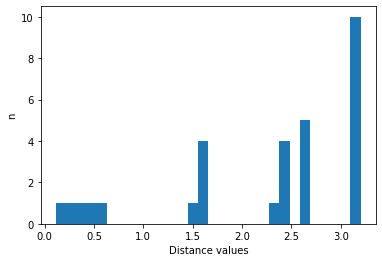

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import seaborn as sns
#adding distance and time values in the dataframe 
dis = dist_array[0:30]
plt.hist(dis,bins=30)
plt.ylabel('n')
plt.xlabel('Distance values')

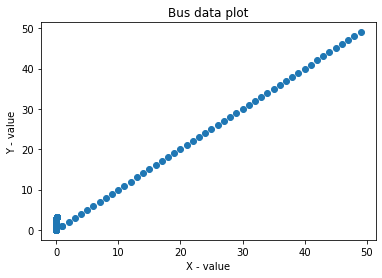

'Note: the plot is linear since the speed is gived an assumed figure, which had to bee since no speed values were observed in the \nresulted MBTA data'

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import seaborn as sns
distances = []
durations = []
for i , r in df.iterrows():
    point1 = {"latitude": r["latitude"], "longitude": r["longitude"]}
    for j, o in df[df.index != i].iterrows():
        point2 = {"latitude": o["latitude"], "longitude": o["longitude"]}
        dist = haversine(r["latitude"], r["longitude"], o["latitude"],o["longitude"])
        #assuming average speed is 50 
        speed = 50
        duration = dist/speed
        distances.append((i, j,dist))
        durations.append((i, j,duration))

# drawScatterplot
x = durations[0:50]
y = distances[0:50]
plt.scatter(x, y)
plt.rcParams.update({'figure.figsize':(10,8), 'figure.dpi':100})
plt.title('Bus data plot')
plt.xlabel('X - value')
plt.ylabel('Y - value')
plt.show()
"""Note: the plot is linear since the speed is gived an assumed figure, which had to bee since no speed values were observed in the 
resulted MBTA data"""

<h1>Give an estimate of the speed of the bus from current_stop_sequence = 1 to the last  current_stop_sequence. </h1> 

Note: You can use the haversine Python library to calculate the distance between two points, given two longitude and latitude coordinates.

In [ ]:

 #pip install haversine
import math
from haversine import haversine, Unit
#calculting the distance first 
def haversine(lat1, lon1, lat2, lon2):
    R = 6372.8  # Earth radius in kilometers
    dLat = radians(lat2 - lat1)
    dLon = radians(lon2 - lon1)
    lat1 = radians(lat1)
    lat2 = radians(lat2)
    a = sin(dLat / 2)**2 + cos(lat1) * cos(lat2) * sin(dLon / 2)**2
    c = 2 * asin(sqrt(a))
    return R * c      
dist_array = []
max = df['current_stop_sequence'].max()
for i , r in df.iterrows():
    if df['current_stop_sequence'].all()==1 :
        point1 = {"latitude": r["latitude"], "longitude": r["longitude"]}
    elif df['current_stop_sequence'].all() == max :
        for j, o in df[df.index != i].iterrows():
            point2 = {"latitude": o["latitude"], "longitude": o["longitude"]}
            dist = haversine(r["latitude"], r["longitude"], o["latitude"],o["longitude"])
            dist_array.append((dist))
distance = round(average(dist_array),2)
speed = distance/averageTime
#to print the results (take note that speed is km per hour and distance is in kilmeters ; therefore , time is measured in hours). 
print('Average distance in kilometers is: ', distance)
print('Average time in hours: ', round(averageTime,2))
print('Speed in km per hour : ', round(speed,2))  